# Solving A Simple Classification Problem with Machine Learning in Python

Let's start by visualing our dataset of fruits:

In [253]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()
# print("Full table:", fruits) # Run this to view full table

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Dataset Analysis
To be able to view a broader version of the dataset, lets print the dimensions of the set to see what we're working with

In [254]:
print(fruits.shape) # Dataframe size
print(fruits['fruit_name'].unique()) # Unique fruit_names in the dataframe
print(fruits.groupby('fruit_name').size()) # Total number of each type of fruit

(59, 7)
['apple' 'mandarin' 'orange' 'lemon']
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


We can see that we have 
- 59 total rows from the table, and 7 unique features/attributes for each row
- 4 unique fruit names (apple, mandarin, orange, lemon)
- How many of each type of fruit we have

### Let's next try to graph these results using seaborn:

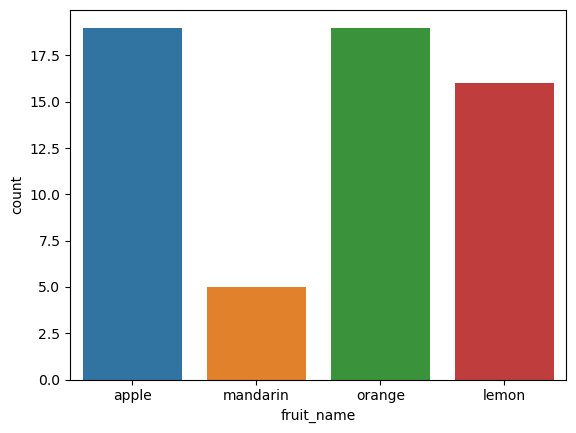

In [255]:
import seaborn as sns
sns.countplot(data=fruits, x='fruit_name')
plt.show()

## Visualization
Let's create a few different charts for the numeric attributes of the fruits (mass, width, height, color_score)

### Box Plots

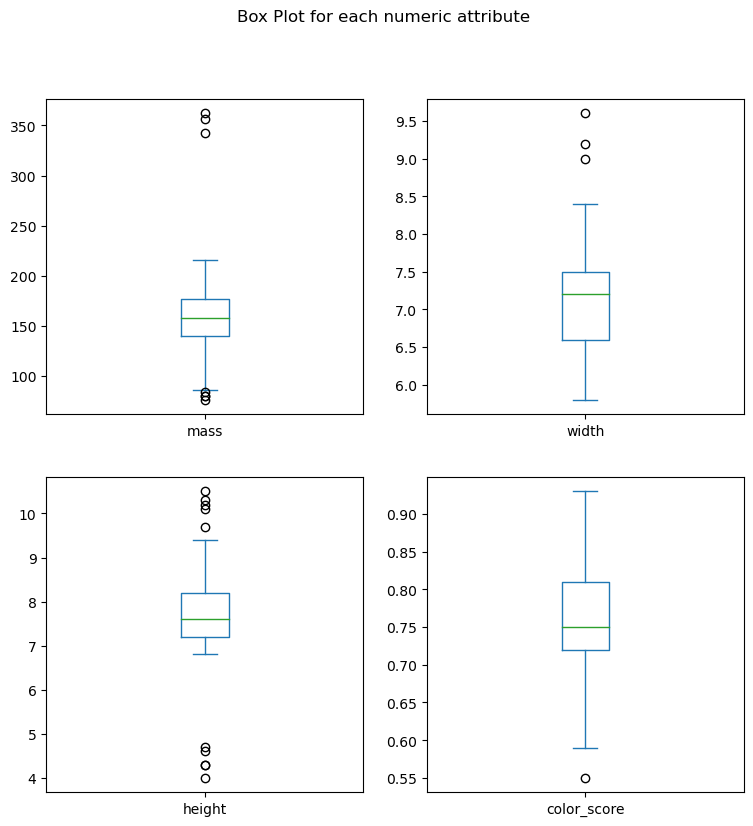

In [256]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each numeric attribute')
# plt.savefig('fruits_box')
plt.show()

### Histogram

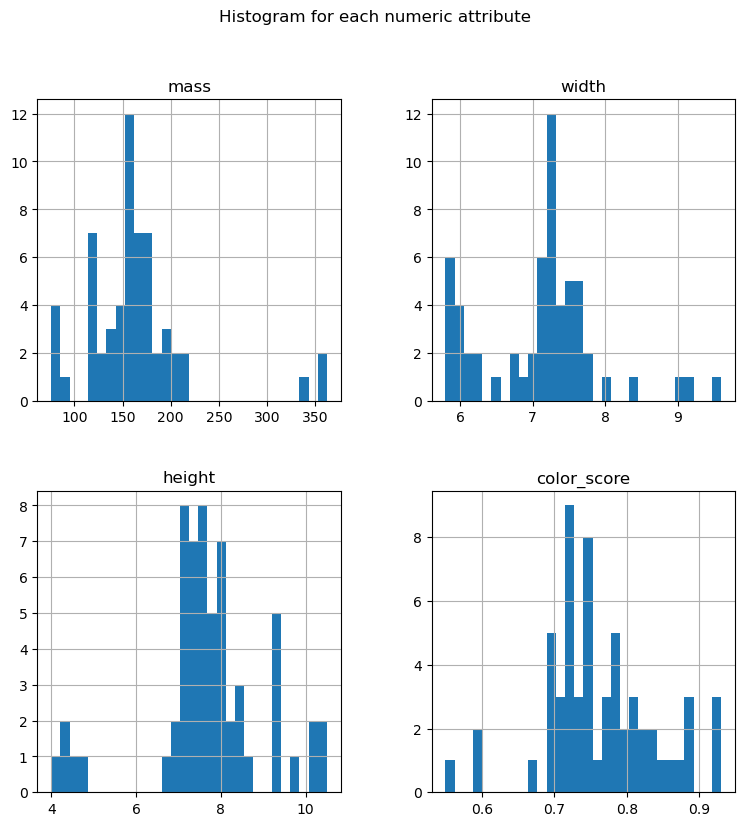

In [257]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric attribute")
# plt.savefig('fruits_hist')
plt.show()

Some pairs of attribute are correlated (like mass and width). With this in mind, its suggest correlation between attributes of fruits. Using this information, we can start seeing predictable relationships between a given fruit's attribute values.

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each numeric attribute')
# plt.savefig('fruits_scatter_matrix')

### Create Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build Models

- ##### Logistic Regression
Logistic Regression is model used in order to predict a simple True or False scenario. Imagine you're trying to predict something that has only two possible outcomes, like whether it will rain tomorrow (yes or no), or if a patient has a disease (positive or negative). Logistic Regression helps you make these kinds of predictions.

In the case of our dataset, we can analyze whether a fruit is a predicted fruit, or not (apple vs not apple, or mandarin vs not mandarin)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

- ##### Decision Tree

A Decision Tree is a model that helps to break down various decisions into smaller, more manageable steps. Think of it like a tree where each branch represents a decision you could make, and each leaf (the end of a branch) represents the outcome of those decisions.

Here's a simple example: Let's say you're trying to decide whether to go for a walk or stay inside. Your Decision Tree might start with a question like, "Is it raining?" If it's yes, one branch might lead to staying inside, while the other branch might lead to checking the temperature. Depending on the temperature, you might decide to go for a walk or stay inside.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

- ##### Setting max decision tree depth to help avoid overfitting

In [ ]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

- ##### K-Nearest Neighbors

k-NN is a model that uses a dataset's already analyzed data in order to make decisions about how a new value may fit into this dataset.

In our case, we have a large dataset of fruits, with various values (mass, width, height, color, etc.) Given the names of these fruits and their values, we can compare a new value to these existing fruits to see which fruit they are the closest to in regards to attributes.

In a nutshell, k-Nearest Neighbor is a simple but effective way to make predictions based on similarities in data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

- ##### Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a method used in machine learning to find a linear combination of features that best separates two or more classes of data.

Imagine you have a bunch of data points in a scatterplot, and they belong to two or more different groups. Linear Discriminant Analysis helps you draw a straight line (or a plane in higher dimensions) that best separates these groups from each other.

So, in essence, Linear Discriminant Analysis is like finding the best way to draw a line between different groups of data points, helping you classify them more accurately based on their features. It's a useful tool for classification tasks in machine learning, especially when you're dealing with multiple classes of data.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

- ##### Gaussian Naive Bayes

Gaussian Naive Bayes is a machine learning model for classification tasks, assuming that the features of the data follow a bell curve distribution. It utilizes Bayes' Theorem to calculate the probability of a data point belonging to a certain category based on its features, making it particularly useful for tasks like spam detection and sentiment analysis.

In the context of our fruit dataset, Gaussian Naive Bayes can help with classifying new fruits into different categories, such as bananas or limes (if these values were to be added). By assuming that the features of the fruits follow a bell curve distribution, the model calculates the probability that a new fruit belongs to each category based on its features, enabling accurate classification even with limited data.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

- ##### Support Vector Machine

In the context of classifying fruits, a Support Vector Machine (SVM) helps draw a line (or boundary) in the space of fruit features to separate different types of fruits. For example, if you have features like color, size, and texture for different fruits, an SVM can find the best way to draw a line that separates apples from oranges and bananas.

Moreover, if the features of fruits don't neatly separate with a straight line, SVM can transform them into a higher-dimensional space where they become separable by a plane. This flexibility allows SVM to handle complex classification tasks, making it a powerful tool for distinguishing between different types of fruits based on their characteristics.

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

After looking over all the various models, we can see that KNN has the most accurate estimate

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

### Plot the Decision Boundary of the k-NN CLassfier

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

In [ ]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')

In [ ]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

In [ ]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

In [ ]:
plot_fruit_knn(X_test, y_test, 5, 'uniform')

In [ ]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])